In [224]:
import random
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [225]:
p = [1000, 2000, 1500, 2500, 300]   # potenciales clientes por anuncio
q = [65, 90, 40, 60, 20]            # valoraciones mínimas
c = [160, 300, 40, 100, 10]         # costos unitarios correspondientes
max_ads = [15, 10, 25, 4, 30]

In [226]:
domains = {i: list(range(max_ads[i] + 1)) for i in range(5)}
domains

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 2: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 3: [0, 1, 2, 3, 4],
 4: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [227]:
def cons_tv(x1, x2):   return c[0]*x1 + c[1]*x2 <= 3800
def cons_dr(x3, x4):   return c[2]*x3 + c[3]*x4 <= 2800
def cons_d_r(x3, x5):  return c[2]*x3 + c[4]*x5 <= 3500

def Z1(x):  return sum(p[i]*q[i]*x[i] for i in range(5))
def Z2(x):  return sum(c[i]*x[i] for i in range(5))

In [228]:
#Función que revisa el domino de las variables del arco consistencia 
def revise(dom, i, j, cn):
    revised = False
    for xi in dom[i][:]:
        if not any(cn(xi, xj) for xj in dom[j]):
            dom[i].remove(xi)
            revised = True
    return revised

In [229]:
#Función AC3
def ac3(dom, arcs):
    queue = deque(arcs)
    while queue:
        i, j, cn = queue.popleft()
        if revise(dom, i, j, cn):
            for a, b, cfunc in arcs:
                if b == i and a != j:
                    queue.append((a, b, cfunc))
    return dom

In [230]:
#Función para frontera de pareto
def dominates_dir(a, b, directions):
    """
    a, b: tuplas (x_int, z1, z2)
    directions: lista ['max'|'min', 'max'|'min']
    """
    za, zb = [a[1], a[2]], [b[1], b[2]]
    # Debe ser al menos tan bueno en todos y mejor en uno
    all_good = all((d=='max' and za[i] >= zb[i]) or (d=='min' and za[i] <= zb[i])
                   for i, d in enumerate(directions))
    strict   = any((d=='max' and za[i] > zb[i])  or (d=='min' and za[i] < zb[i])
                   for i, d in enumerate(directions))
    return all_good and strict

In [231]:
def pareto_front(sols, directions):
    """Devuelve la lista de soluciones no dominadas según 'directions'."""
    front = []
    for s in sols:
        if not any(dominates_dir(o, s, directions) for o in sols if o!=s):
            front.append(s)
    return front


In [232]:
def dominates(a, b):
    """¿a = (x_a, Z1_a, Z2_a) domina a b = (x_b, Z1_b, Z2_b)?"""
    Za1, Za2 = a[1], a[2]
    Zb1, Zb2 = b[1], b[2]
    return (Za1 >= Zb1 and Za2 <= Zb2) and (Za1 > Zb1 or Za2 < Zb2)

In [233]:
arcos = [
    (0,1,cons_tv), (1,0,lambda x2,x1: cons_tv(x1,x2)),
    (2,3,lambda x3,x4: cons_dr(x3,x4)), (3,2,lambda x4,x3: cons_dr(x3,x4)),
    (2,4,lambda x3,x5: cons_d_r(x3,x5)), (4,2,lambda x5,x3: cons_d_r(x3,x5)),
]

In [234]:
pruned = ac3({i: domains[i].copy() for i in domains}, arcos)

In [235]:
N, T = 50, 100
all_solutions = []   # acumularemos (x_int, Z1, Z2)
pop = [[random.uniform(0, max_ads[i]) for i in range(5)] for _ in range(N)]
pop

[[1.0786564926102316,
  3.53659373874178,
  0.9002819390002081,
  1.876531418704738,
  1.9397826315940747],
 [13.817405436814497,
  7.008699317310246,
  5.211386935276249,
  2.6340833063832325,
  0.022763273921654337],
 [9.027441681960768,
  9.647195844889232,
  14.71725261299108,
  0.17296929409144113,
  6.102788019601823],
 [3.4602526946230947,
  4.998521790258024,
  7.3821373245749005,
  0.9763584976549149,
  21.311710823210927],
 [14.731926430221025,
  3.5920671000050044,
  0.7706378919982021,
  0.8196602195048706,
  11.060824722189329],
 [7.221520445613886,
  0.6035732449458309,
  17.85929749420579,
  1.979224992549867,
  5.584671254439004],
 [13.404368638514573,
  7.694316800124908,
  22.70816837167202,
  0.743801767469709,
  22.007986382497673],
 [12.575119822307533,
  2.5932205874515155,
  1.4425923357240773,
  0.8191489860827699,
  24.64890103091644],
 [6.960970198504212,
  6.7352755547128815,
  3.9216192057669437,
  3.5154133539305668,
  19.316318995285187],
 [10.873190775629

In [236]:
def record_solution(x_int):
    z1, z2 = Z1(x_int), Z2(x_int)
    tup = (tuple(x_int), z1, z2)
    all_solutions.append(tup)

In [237]:
def discretize(ind):
    """Convierte solución real a entera redondeando."""
    return [int(round(val)) for val in ind]

In [238]:
#Penalización cuando no se cumplen las restricciones (algoritmo monoobjetivo).
def penalty(x):
    """Penaliza violaciones de presupuesto."""
    pen = 0
    if c[0]*x[0] + c[1]*x[1] > 3800:
        pen += (c[0]*x[0] + c[1]*x[1] - 3800)
    if c[2]*x[2] + c[3]*x[3] > 2800:
        pen += (c[2]*x[2] + c[3]*x[3] - 2800)
    if c[2]*x[2] + c[4]*x[4] > 3500:
        pen += (c[2]*x[2] + c[4]*x[4] - 3500)
    return pen * 100  # factor de penalización

In [239]:
def objective(x):
    """Calidad ponderada a maximizar."""
    return sum(p[i] * q[i] * x[i] for i in range(5))

In [240]:
#Resultado
def fitness(x):
    """Función de fitness combinando objetivo y penalización."""
    return objective(x) - penalty(x)

In [241]:
#Se guarda la población de soluciones iniciales factibles
for ind in pop:
    x_int = [int(round(v)) for v in ind]
    if cons_tv(x_int[0],x_int[1]) and cons_dr(x_int[2],x_int[3]) and cons_d_r(x_int[2],x_int[4]):
        record_solution(x_int)

In [242]:
#Se evaluan todas las soluciónes y se define al lider inicial 
pop_eval = [(fitness(discretize(ind)), ind) for ind in pop]
best_eval, leader = max(pop_eval, key=lambda t: t[0])
print(f"Mejor solución inicial: {leader} con fitness {best_eval}")

Mejor solución inicial: [11.326557305540465, 7.853398569988822, 21.776320664647415, 3.3894631898884597, 26.742890788779203] con fitness 4051000


In [243]:

for t in range(1, T+1):
    new_pop = []
    for ind in pop:
        leader = random.choice(all_solutions)[0]
        if random.random() < 0.5:
            new = [ ind[i] + random.random()*(leader[i]-ind[i])*random.randint(1,2) for i in range(5) ]
        else:
            factor = 1 - t/ T
            new = [ ind[i] + random.random()*(leader[i]-ind[i])*factor for i in range(5) ]
        new = [ max(0, min(max_ads[i], v)) for i, v in enumerate(new) ]
        new_pop.append(new)
    # evaluamos y grabamos factibles
    for ind in new_pop:
        x_int = [int(round(v)) for v in ind]
        if cons_tv(x_int[0],x_int[1]) and cons_dr(x_int[2],x_int[3]) and cons_d_r(x_int[2],x_int[4]):
            record_solution(x_int)
    pop = new_pop
    pop_eval = [(fitness(discretize(ind)), ind) for ind in pop]
    current_best_eval, current_best = max(pop_eval, key=lambda t: t[0])
    if current_best_eval > best_eval:
        best_eval, best = current_best_eval, current_best

In [244]:
front_maxmin = pareto_front(all_solutions, ['max','min'])

front_minmax = pareto_front(all_solutions, ['min','max'])

In [245]:
df_mm = pd.DataFrame([(z1,z2) for _,z1,z2 in front_maxmin], columns=['Z1','Z2'])
df_mn = pd.DataFrame([(z1,z2) for _,z1,z2 in front_minmax], columns=['Z1','Z2'])

In [246]:
print(df_mm.describe()[['Z1','Z2']])
print(df_mn.describe()[['Z1','Z2']])

                 Z1           Z2
count  4.600000e+01    46.000000
mean   2.704174e+06  3135.217391
std    7.337993e+05  1162.280783
min    1.116000e+06   840.000000
25%    2.190000e+06  2347.500000
50%    2.759000e+06  3050.000000
75%    3.338250e+06  4130.000000
max    3.787000e+06  4920.000000
                 Z1           Z2
count  4.600000e+01    46.000000
mean   2.185065e+06  3632.173913
std    8.387252e+05  1047.763572
min    7.020000e+05  1480.000000
25%    1.466000e+06  2812.500000
50%    2.245000e+06  3925.000000
75%    2.754750e+06  4457.500000
max    3.674000e+06  5050.000000


In [247]:
mm_sorted = df_mm.sort_values('Z1').reset_index(drop=True)
mm_sorted

,Z1,Z2
0,1116000,840
1,1176000,970
2,1380000,1190
3,1384000,1300
4,1632000,1400
5,1746000,1590
6,2010000,1820
7,2010000,1820
8,2020000,2120
9,2085000,2190


In [248]:
# Resultado final
best_int = discretize(leader)
print("\nSolución encontrada:")
print(f" x = {best_int}")
print(f" Calidad total = {objective(best_int)}")
print(f" Costos -> TV: {c[0]*best_int[0] + c[1]*best_int[1]}, "
      f"Diario–Revista: {c[2]*best_int[2] + c[3]*best_int[3]}, "
      f"Diario–Radio: {c[2]*best_int[2] + c[4]*best_int[4]}")


Solución encontrada:
 x = [13, 4, 13, 2, 5]
 Calidad total = 2675000
 Costos -> TV: 3280, Diario–Revista: 720, Diario–Radio: 570


In [249]:
ideal_z1 = mm_sorted['Z1'].max()
ideal_z2 = mm_sorted['Z2'].min()

In [250]:
distances = np.sqrt((mm_sorted['Z1'] - ideal_z1)**2 + (mm_sorted['Z2'] - ideal_z2)**2)
best_idx  = distances.idxmin()
best_z1   = mm_sorted.loc[best_idx, 'Z1']
best_z2   = mm_sorted.loc[best_idx, 'Z2']
distances

0     2.671000e+06
1     2.611000e+06
2     2.407000e+06
3     2.403000e+06
4     2.155000e+06
5     2.041000e+06
6     1.777000e+06
7     1.777000e+06
8     1.767000e+06
9     1.702001e+06
10    1.621001e+06
11    1.610001e+06
12    1.558001e+06
13    1.544001e+06
14    1.495001e+06
15    1.449001e+06
16    1.352001e+06
17    1.300001e+06
18    1.271001e+06
19    1.185002e+06
20    1.102002e+06
21    1.068002e+06
22    1.036002e+06
23    1.020002e+06
24    9.890027e+05
25    9.390028e+05
26    8.920035e+05
27    7.210045e+05
28    7.060056e+05
29    6.980059e+05
30    5.960070e+05
31    5.470084e+05
32    5.120097e+05
33    4.720108e+05
34    4.410125e+05
35    3.350181e+05
36    3.280196e+05
37    3.160210e+05
38    2.950233e+05
39    2.680262e+05
40    2.290309e+05
41    2.270330e+05
42    1.730440e+05
43    1.370572e+05
44    6.712109e+04
45    4.080000e+03
dtype: float64

In [251]:
plt.figure(figsize=(8,6))


mn_sorted = df_mn.sort_values('Z1').reset_index(drop=True)
x_common = np.linspace(
    max(mm_sorted['Z1'].min(), mn_sorted['Z1'].min()),
    min(mm_sorted['Z1'].max(), mn_sorted['Z1'].max()),
    200
)

<Figure size 800x600 with 0 Axes>

In [252]:
y_mm = np.interp(x_common, mm_sorted['Z1'], mm_sorted['Z2'])
y_mn = np.interp(x_common, mn_sorted['Z1'], mn_sorted['Z2'])

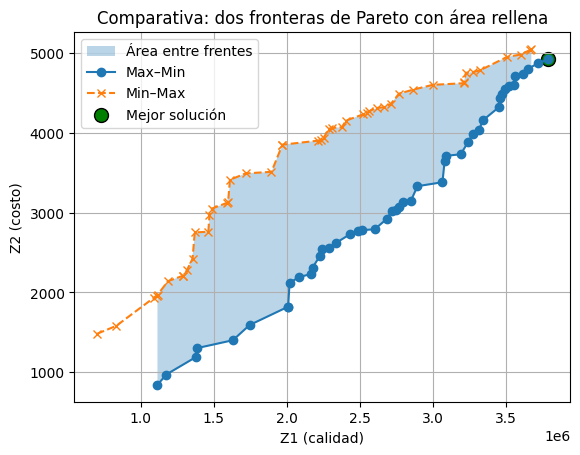

In [253]:
plt.fill_between(x_common, y_mm, y_mn, alpha=0.3, label='Área entre frentes')

# Dibujamos ambos frentes
plt.plot(mm_sorted['Z1'], mm_sorted['Z2'], marker='o', linestyle='-', label='Max–Min')
plt.plot(mn_sorted['Z1'], mn_sorted['Z2'], marker='x', linestyle='--', label='Min–Max')

# Marcamos la mejor solución en verde
plt.scatter([best_z1], [best_z2],
            color='green', s=100, edgecolors='black',
            label='Mejor solución')

plt.xlabel('Z1 (calidad)')
plt.ylabel('Z2 (costo)')
plt.title('Comparativa: dos fronteras de Pareto con área rellena')
plt.legend()
plt.grid(True)
plt.show()